In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

In [74]:
df = pd.read_csv('placement_dataset.csv')

<!-- Column Name	Description -->
College_ID	Unique ID of the college (e.g., CLG0001 to CLG0100)

IQ	Student’s IQ score (normally distributed around 100)

Prev_Sem_Result	GPA from the previous semester (range: 5.0 to 10.0)

CGPA	Cumulative Grade Point Average (range: ~5.0 to 10.0)

Academic_Performance	Annual academic rating (scale: 1 to 10)

Internship_Experience	Whether the student has completed any internship (Yes/No)

Extra_Curricular_Score	Involvement in extracurriculars (score from 0 to 10)

Communication_Skills	Soft skill rating (scale: 1 to 10)

Projects_Completed	Number of academic/technical projects completed (0 to 5)

Placement	Final placement result (Yes = Placed, No = Not Placed)

In [3]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [76]:
df.drop(columns=['College_ID'], inplace=True) 

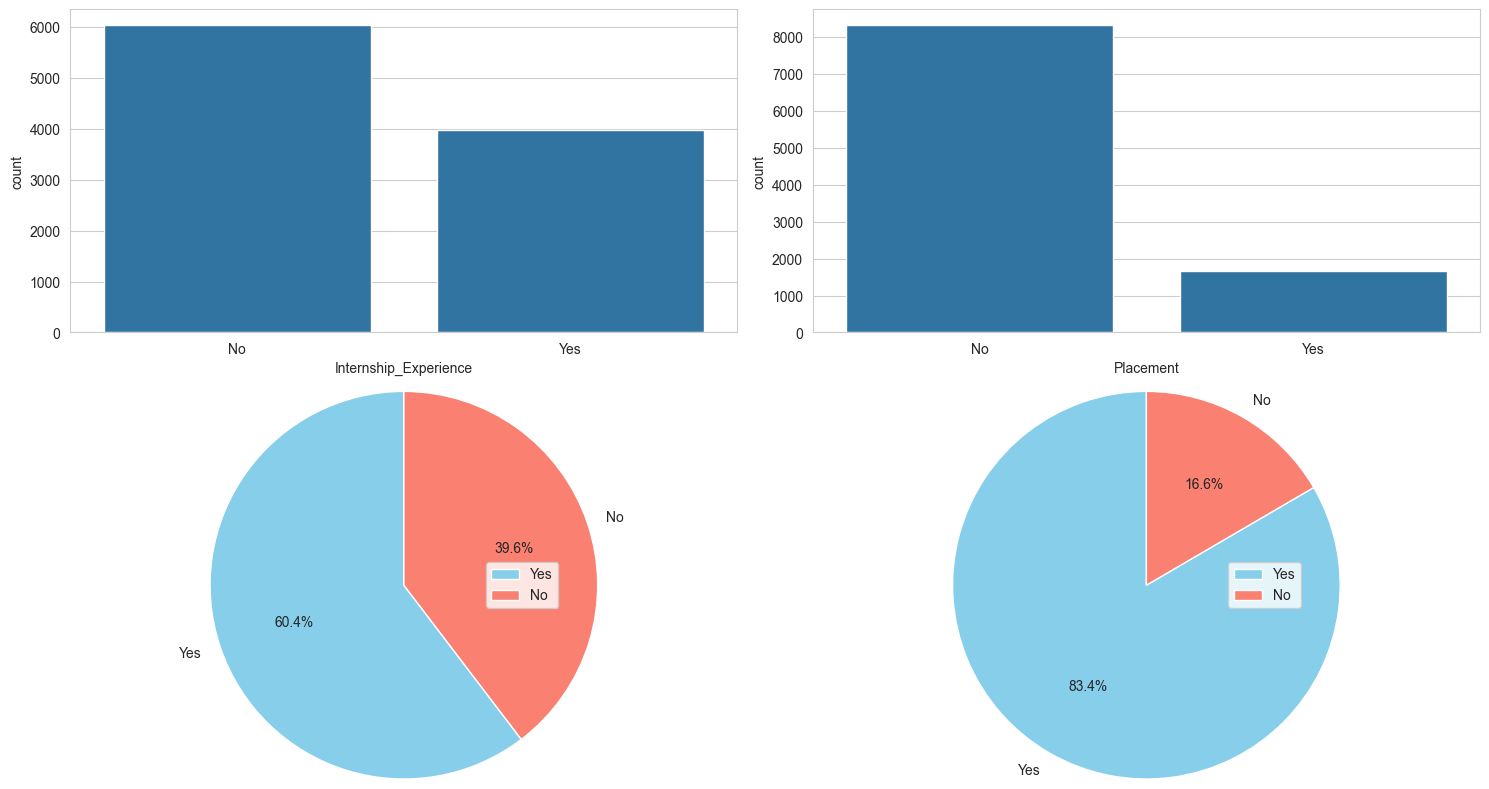

In [6]:
# Plotting a graph to show the value counts for the Categorical Columns

column = ['Internship_Experience', 'Placement']
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
for i, col in enumerate(column):
    plt.subplot(2,len(column), i+1)
    sns.countplot(data=df, x=col)

    plt.subplot(2,len(column), len(column)+i+1)
    plt.pie(df[col].value_counts(), autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'], radius=1.5, labels=['Yes', 'No'])
    plt.legend()
    plt.tight_layout()

plt.show()


In [7]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


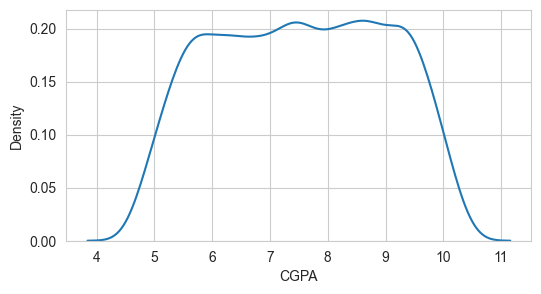

In [8]:
plt.figure(figsize=(6, 3))
sns.kdeplot(data=df['CGPA'])
plt.show()

In [9]:
# Checking the mean, min or max values of the numerical Columns

for i, col in enumerate(df.drop(columns=['Internship_Experience','Placement'])):
    mean = df[col].mean()
    min = df[col].min()
    max = df[col].max()

    print(f'Mean of {col}: {mean}\nMin value of {col}: {min}\nMax value of {col}: {max}')
    print('------------------')

Mean of IQ: 99.4718
Min value of IQ: 41
Max value of IQ: 158
------------------
Mean of Prev_Sem_Result: 7.535672999999999
Min value of Prev_Sem_Result: 5.0
Max value of Prev_Sem_Result: 10.0
------------------
Mean of CGPA: 7.532379
Min value of CGPA: 4.54
Max value of CGPA: 10.46
------------------
Mean of Academic_Performance: 5.5464
Min value of Academic_Performance: 1
Max value of Academic_Performance: 10
------------------
Mean of Extra_Curricular_Score: 4.9709
Min value of Extra_Curricular_Score: 0
Max value of Extra_Curricular_Score: 10
------------------
Mean of Communication_Skills: 5.5618
Min value of Communication_Skills: 1
Max value of Communication_Skills: 10
------------------
Mean of Projects_Completed: 2.5134
Min value of Projects_Completed: 0
Max value of Projects_Completed: 5
------------------


In [55]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot


<function seaborn.categorical.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, dodge='auto', width=0.8, gap=0, whis=1.5, linecolor='auto', linewidth=None, fliersize=None, hue_norm=None, native_scale=False, log_scale=None, formatter=None, legend='auto', ax=None, **kwargs)>

<Figure size 600x400 with 0 Axes>

In [11]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


<Axes: xlabel='Prev_Sem_Result', ylabel='CGPA'>

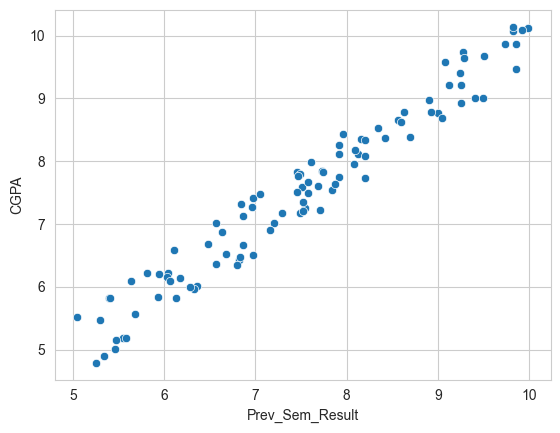

In [14]:
x = df['Prev_Sem_Result'].sample(1000)
y = df['CGPA'].sample(1000)
sns.scatterplot(data=df, x=x, y=y)

Students with higher previous semester results tend to have higher CGPA.

This indicates a positive correlation between Prev_Sem_Result and CGPA.

In [15]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


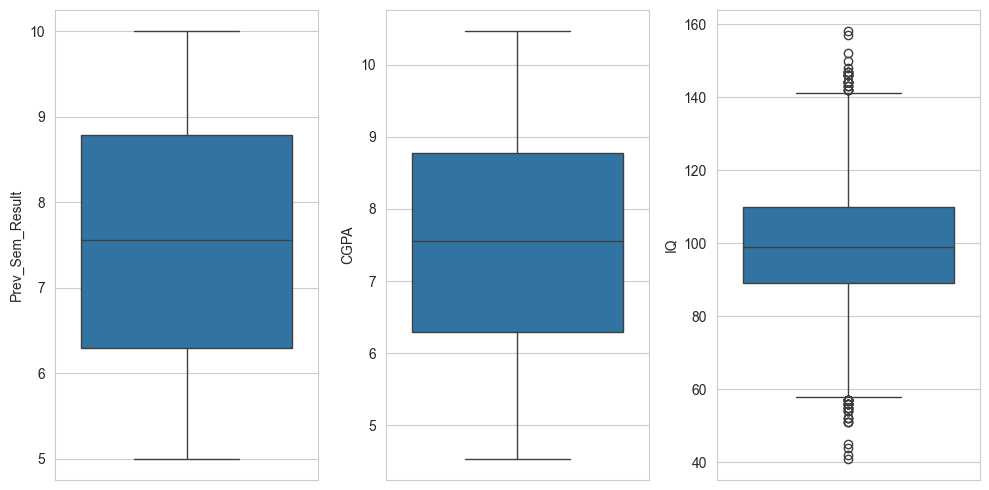

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(df['Prev_Sem_Result'])

plt.subplot(1, 3, 2)
sns.boxplot(df['CGPA'])

plt.subplot(1, 3, 3)
sns.boxplot(df['IQ'])

plt.tight_layout()

The IQ column contains some outliers, but their presence is minimal and unlikely to have a significant impact on the model.

In [27]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


In [29]:
cols = df.drop(columns=['Internship_Experience', 'Placement'])
cm = cols.corr()

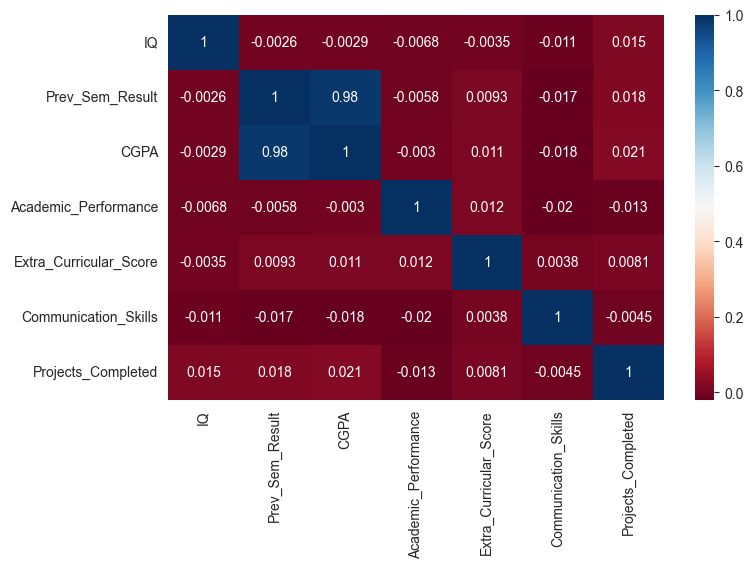

In [35]:
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap='RdBu')
plt.show()

In [78]:
le = LabelEncoder()
df['Internship_Experience'] = le.fit_transform(df['Internship_Experience'])
df['Placement'] = le.fit_transform(df['Placement'])


In [81]:
X = df.drop(columns=['Placement'])
y = df['Placement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

In [110]:
X_train

,IQ,CGPA,Academic_Performance,Communication_Skills,Projects_Completed
6244,90,9.86,5,4,5
2697,80,5.28,10,9,5
4016,92,6.50,1,2,1
4339,95,7.16,5,7,2
4645,124,7.16,1,5,5
...,...,...,...,...,...
5734,91,9.72,6,8,1
5191,99,7.36,9,10,0
5390,89,6.66,1,1,5
860,103,7.57,4,3,2


In [111]:
mi_scores = mutual_info_classif(X_train, y_train)
mi_scores = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)


In [ ]:
X_train.drop(columns=['Prev_Sem_Result', 'Internship_Experience', 'Extra_Curricular_Score'], inplace=True)
X_test.drop(columns=['Prev_Sem_Result', 'Internship_Experience', 'Extra_Curricular_Score'], inplace=True)

In [115]:
X_train

,IQ,CGPA,Academic_Performance,Communication_Skills,Projects_Completed
6244,90,9.86,5,4,5
2697,80,5.28,10,9,5
4016,92,6.50,1,2,1
4339,95,7.16,5,7,2
4645,124,7.16,1,5,5
...,...,...,...,...,...
5734,91,9.72,6,8,1
5191,99,7.36,9,10,0
5390,89,6.66,1,1,5
860,103,7.57,4,3,2


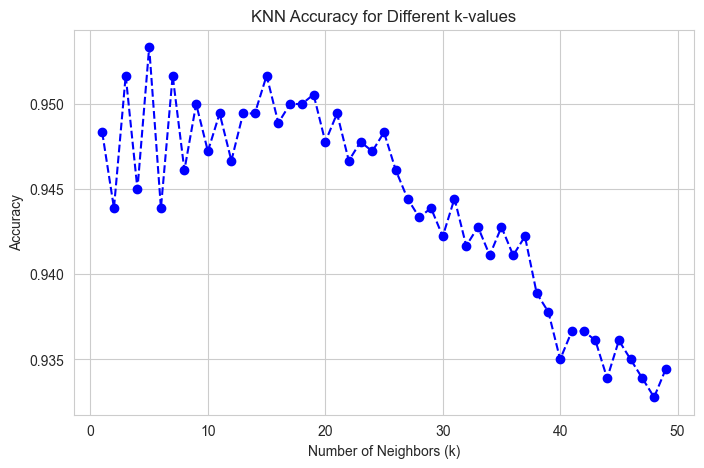

In [116]:
accuracies = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting a graph to check wether it overfits or not
plt.figure(figsize=(8,5))
plt.plot(range(1, 50), accuracies, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k-values')
plt.grid(True)
plt.show()



In [100]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)


In [101]:
import joblib
joblib.dump(model, 'Model.joblib')

['Model.joblib']

In [103]:
X_train.head()

,IQ,CGPA,Academic_Performance,Communication_Skills,Projects_Completed
6244,90,9.86,5,4,5
2697,80,5.28,10,9,5
4016,92,6.50,1,2,1
4339,95,7.16,5,7,2
4645,124,7.16,1,5,5
